In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
np.random.seed(0)

# Create a DataFrame with example data
df = pd.DataFrame({
    'spot_percentile_rank': np.random.rand(100),  # Random values between 0 and 1
    'vol_percentile_rank': np.random.rand(100),   # Random values between 0 and 1
    'text_label': [f'Point {i}' for i in range(100)],  # Unique label for each point
    'GICS_SECTOR_NAME': np.random.choice(['Automobiles', 'Banks', 'Basic Resources', 'Chemicals',
                                          'Construction & Materials', 'Financial Services', 'Food & Beverage',
                                          'Health Care', 'Industrial Goods & Services', 'Insurance', 'Media',
                                          'Oil & Gas', 'Technology', 'Telecom', 'Utilities'
                                         ], 100)  # Random sectors
})

# Update the color palette with colors for all listed sectors
color_palette = {
    'Automobiles': (245/255, 66/255, 66/255),  # Red
    'Banks': (0, 0, 128/255),  # Navy
    'Basic Resources': (184/255, 134/255, 11/255),  # Dark Golden Rod
    'Chemicals': (60/255, 179/255, 113/255),  # Medium Sea Green
    'Construction & Materials': (0, 100/255, 0),  # Dark Green
    'Financial Services': (128/255, 128/255, 128/255),  # Grey
    'Food & Beverage': (165/255, 42/255, 42/255),  # Brown
    'Health Care': (245/255, 66/255, 66/255),  # Red
    'Industrial Goods & Services': (64/255, 224/255, 208/255),  # Turquoise
    'Insurance': (218/255, 165/255, 32/255),  # Golden Rod
    'Media': (255/255, 215/255, 0),  # Gold
    'Oil & Gas': (255/255, 200/255, 0),  # Yellow
    'Technology': (100/255, 100/255, 240/255),  # Blue
    'Telecom': (0, 191/255, 255/255),  # Deep Sky Blue
    'Utilities': (72/255, 61/255, 139/255)  # Dark Slate Blue
}

# Map sector names to color palette, Convert the RGB tuples to a format that matplotlib accepts, e.g., '#RRGGBB'
df['color'] = df['GICS_SECTOR_NAME'].map(color_palette)

# Convert the RGB tuples to a format that matplotlib accepts, e.g., '#RRGGBB'
df['color'] = df['color'].apply(lambda rgb: f'#{int(rgb[0]*255):02x}{int(rgb[1]*255):02x}{int(rgb[2]*255):02x}')
df

,spot_percentile_rank,vol_percentile_rank,text_label,GICS_SECTOR_NAME,color
0,0.548814,0.677817,Point 0,Food & Beverage,#a52a2a
1,0.715189,0.270008,Point 1,Health Care,#f54242
2,0.602763,0.735194,Point 2,Basic Resources,#b8860b
3,0.544883,0.962189,Point 3,Technology,#6464f0
4,0.423655,0.248753,Point 4,Oil & Gas,#ffc800
...,...,...,...,...,...
95,0.183191,0.490459,Point 95,Media,#ffd700
96,0.586513,0.227415,Point 96,Oil & Gas,#ffc800
97,0.020108,0.254356,Point 97,Health Care,#f54242
98,0.828940,0.058029,Point 98,Technology,#6464f0


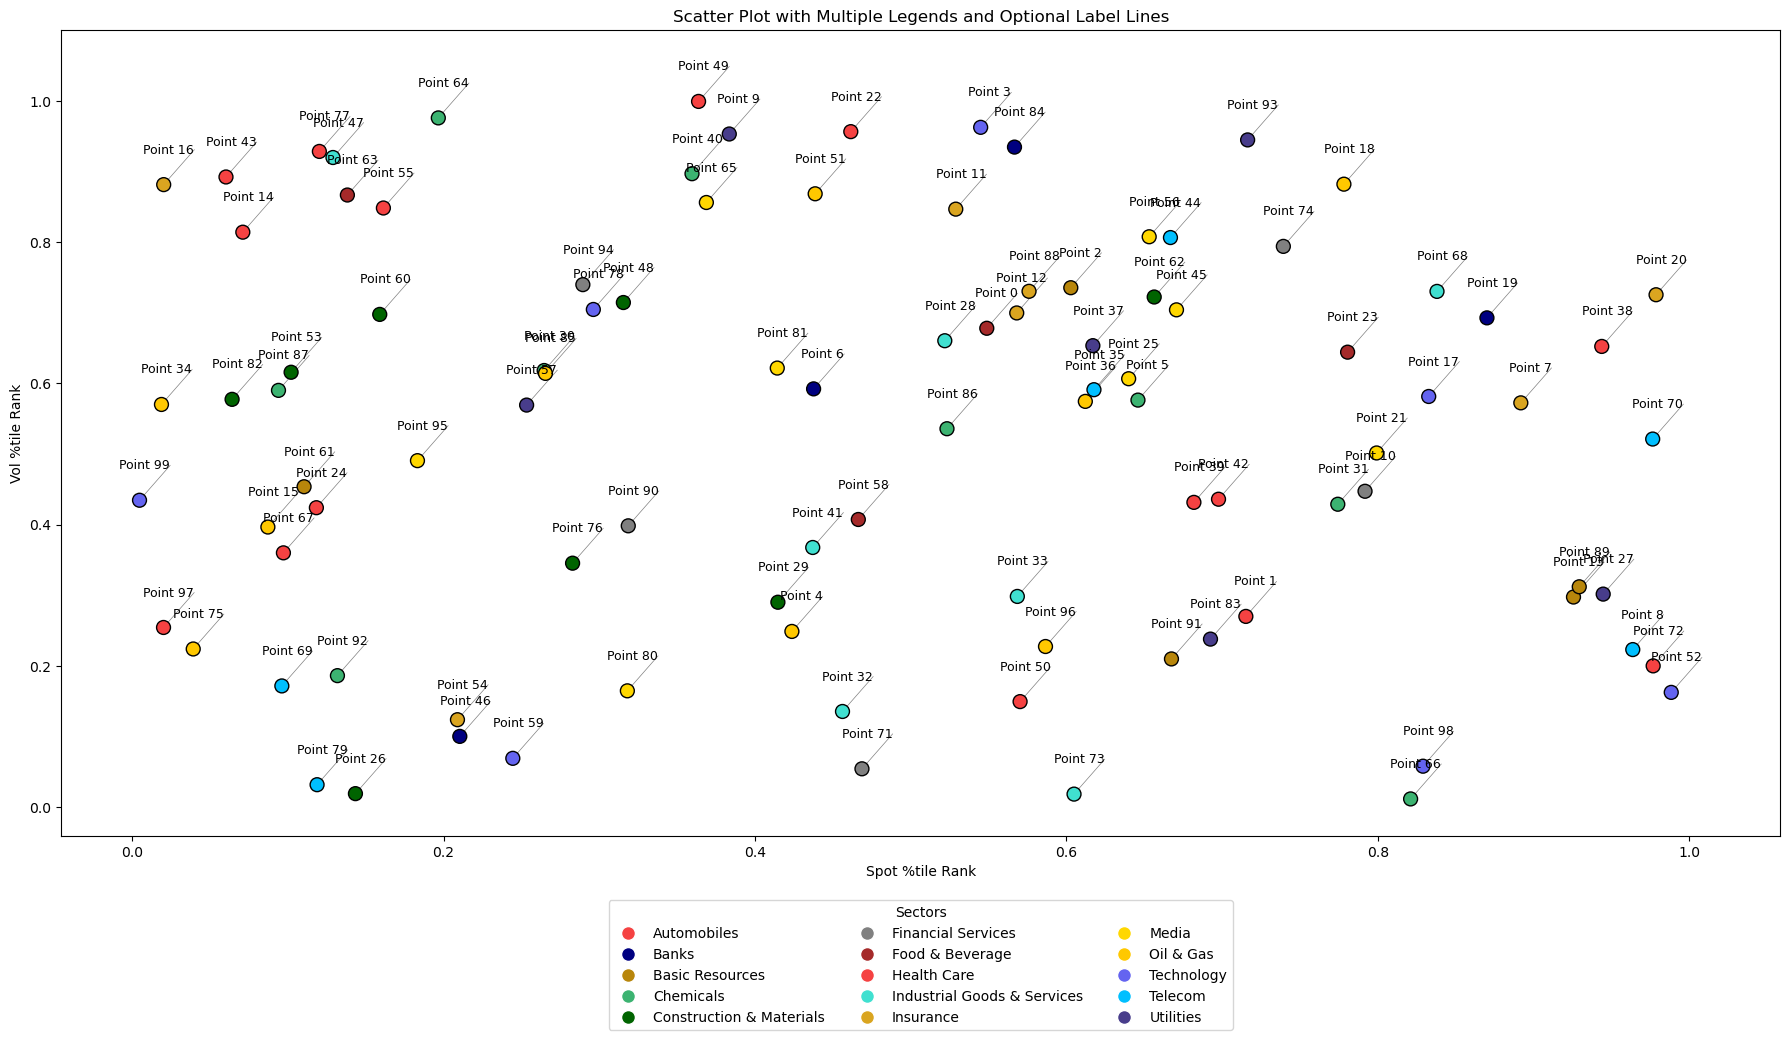

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def scatter_plot_with_legends(df, x_col, y_col, text_col, color_col, sector_col, xlabel='x-axis', ylabel='y-axis', draw_lines=False):
    fig, ax = plt.subplots(figsize=(18, 12))  # Adjust the figure size for better layout

    # Scatter points
    ax.scatter(df[x_col], df[y_col], color=df[color_col], s=100, edgecolor='k', zorder=2)

    # Define offsets for label placement outside the loop
    x_offset = (df[x_col].max() - df[x_col].min()) * 0.02
    y_offset = (df[y_col].max() - df[y_col].min()) * 0.05

    for i, row in df.iterrows():
        label_x = row[x_col] + x_offset
        label_y = row[y_col] + y_offset

        # Optionally draw lines
        if draw_lines:
            ax.plot([row[x_col], label_x], [row[y_col], label_y], color="gray", linestyle='-', linewidth=0.5, zorder=1)

        # Place text annotation
        ax.text(label_x, label_y, row[text_col], fontsize=9, ha='right', va='center', zorder=3)

    # Generate legend items directly from the color_palette
    sector_legend_items = [plt.Line2D([], [], marker='o', markerfacecolor=color, color='w', markersize=10, label=sector)
                           for sector, color in color_palette.items()]

    # Create the legend for sectors
    legend = ax.legend(handles=sector_legend_items, title='Sectors', loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=3, fancybox=True)

    # Set the x and y axis labels and the plot title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title('Scatter Plot with Multiple Legends and Optional Label Lines')

    # Adjust layout to accommodate the legend and labels
    plt.tight_layout(rect=[0, 0.1, 1, 1])

    # Display the plot
    plt.show()

# Example usage of the function with lines being drawn
scatter_plot_with_legends(df, 'spot_percentile_rank', 'vol_percentile_rank', 'text_label', 'color', 'GICS_SECTOR_NAME', xlabel='Spot %tile Rank', ylabel='Vol %tile Rank', draw_lines=True)